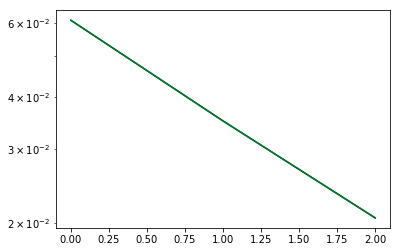

0.0058912831264024135
0.027403674514062004


In [32]:
import numpy as np
#from numba import jit


def int3points(x1,x2,x3,y1,y2,y3):
    x0 = x1 + 1e-15
    np.reciprocal(x0,out=x0)
    x4 = x2 + 1e-15
    np.reciprocal(x4,out=x4)
    #x4 = 1/(x2+1e-15)
    x5 = x3**2
    x6 = x0*x5
    x7 = x4*x6
    x7 += 1
    x7_ = x0 + x4
    x7_ *= x3
    x7 -= x7_
    x7 += 1e-15
    np.reciprocal(x7,out=x7)
    #x7 = 1/(x7+1e-15)
    #x7 = 1/(-x3*(x0 + x4) + x4*x6 + 1)
    x8 = x1 - x2
    x9 = x8+1e-15
    np.reciprocal(x9,out=x9)
    x10 = x3 - x6
    x10_ = x1*x4
    x11 = x10_*x10
    x11 *= x7
    x11 *= x9
    x12 = x1**2
    x13 = x12+1e-15
    np.reciprocal(x13,out=x13)
    x14 = x2*x9
    x15 = x0*x14
    x16 = x10*x15 
    x16 -= x13*x5
    x16 *= x7
    #x16 = x7*(x10*x15 - x13*x5)
    x17 = x7*y3
    x17 += x16*y1
    x17 -= x11*y2
    #x17 = -x11*y2 + x16*y1 + x7*y3
    x18 = x2**2
    x19 = -x13
    x19 *= x18
    x19 += 1
    #x19 = -x13*x18 + 1
    x20 = x4*x9
    x21 = x7*y3
    x21 += x16*y1
    x21 *= x4
    x21 *= x9
    x21 *= x19
    x21 -= y2*x20
    x21 *= -x1
    x21 -= x15*y1
    x21_ = y2*x10
    x21_ *= x12
    x21_ *= x19
    x21_ *= x7
    x21__ = x18*x8
    x21__ *= x8
    x21__ += 1e-15
    x21_ /= x21__
    x21 += x21_
    #x21 += y2*x10*x12*x19*x7/(x18*x8**2+1e-15)
    x21 /= 2.
    #x21 = (-x1*x4*x9*x19*x7*y3 -x1*x4*x9*x19*x16*y1 + x1*y2*x20 - x15*y1  + y2*x10*x12*x19*x7/(x18*x8**2))/2
    #x21 = (-x1*(x4*x9*x19*(x7*y3 + x16*y1) - y2*x20) - x15*y1  + y2*x10*x12*x19*x7/(x18*x8**2))/2
    x22 = -x19
    x22 *= x20
    x22 += x13
    #x22 = x13 - x19*x20
    x23 = x11*x22
    x23 -= x20
    x23 *= y2
    x23_ = x13*x14
    x23_ += x13
    x23_ -= x16*x22
    x23_ *= y1
    x23 += x23_
    x23_ = -x22
    x23_ *= x7
    x23_ *= y3
    x23 += x23_
    x23 /= 3.
    #x23 = (-x22*x7*y3 + y1*(x13*x14 + x13 - x16*x22) + y2*(x11*x22 - x20))/3
    out = x3 - x1
    out *= x17
    out_ = x1*x23
    out_ += x21
    out_ *= x12
    out -= out_
    out_ = x23*x3
    out_ += x21
    out_ *= x5
    out += out_
    #out = -x12*(x1*x23 + x21) + x17*(x3 - x1) + x5*(x21 + x23*x3)
    return out

def simps(y,x,axis=None):
    assert len(x) == len(y), "sizes of x and y not same {} an {}".format(len(x),len(y))
    assert len(x) >= 4, "not enough points to integrate only {}".format(len(x))
    #arg = np.argsort(x)
    #x = x[arg]
    #y = y[arg]
    #generate the X1,X2,X3
    X1 = x[0:len(x)-2]
    X2 = x[1:len(x)-1]
    X3 = x[2:len(x)]
    Y1 = y[0:len(x)-2]
    Y2 = y[1:len(x)-1]
    Y3 = y[2:len(x)]
    I = int3points(X1,X2,X3,Y1,Y2,Y3)
    #out = (np.sum(I) + (x[1] - x[0])/(x[2] - x[0])*I[0] + (x[-1] - x[-2])/(x[-1] - x[-3])*I[-1])/2.
    out = (np.sum(I) + (x[1] - x[0])*(y[0] + y[1])/2. + (x[-1] - x[-2])*(y[-2] + y[-1])/2.)/2.
    return out

if __name__ == '__main__':
    import numpy as np
    from scipy.integrate import simps as simps_scipy
    import pylab as plt

    def f(x):
        return x**2

    def g(x):
        return np.exp(-(x - 0.5)**2)#/np.sqrt(2*np.pi)

    error1 = []
    error2 = []
    for i in range(4,10,2):
        x = 10**np.linspace(np.log10(0.001),np.log10(1),i)
        #x = np.linspace(0.001,1,i)
        ans = x[-1]**3/3. - x[0]**3/3.
        error1.append(np.abs(simps_scipy(f(x),x) - ans))
        error2.append(np.abs(simps(f(x),x) - ans))

    plt.plot(error1,c='blue')
    plt.plot(error2,c='green')
    plt.yscale('log')
    plt.show()
    from time import clock
    x = 10**np.linspace(np.log10(0.001),np.log10(1),100000)
    y = f(x)
    t1 = clock()
    simps_scipy(y,x)
    print(clock() - t1)
    t1 = clock()
    simps(y,x)
    print(clock() - t1)